In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

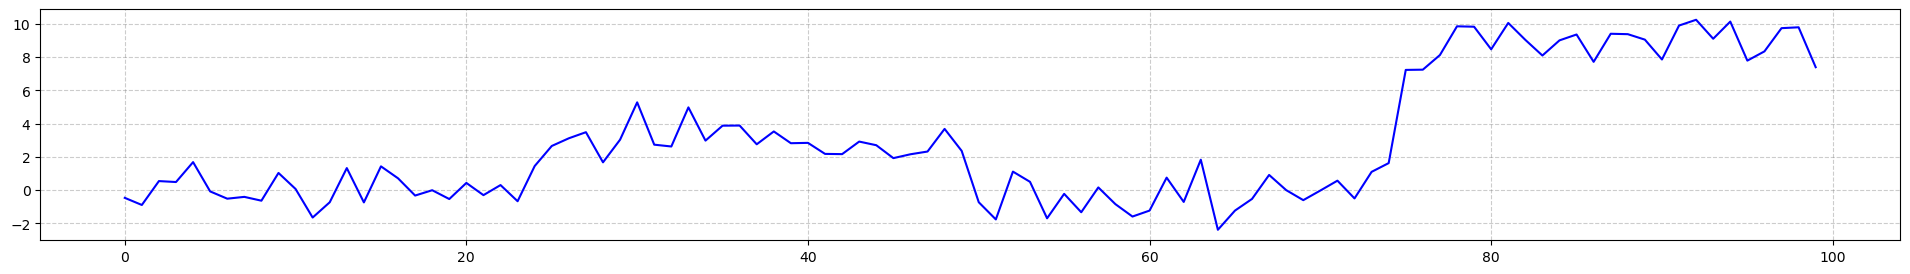

Detected change points: [25, 50, 75]
Total cost: 128.96460537926646


In [3]:
def calculate_cost(data, s, t):
    segment = data[s:t+1]
    mean_segment = np.mean(segment)
    cost = np.sum((segment - mean_segment) ** 2)
    return cost

def pelt(data, penalty):
    n = len(data)
    F = np.zeros(n+1)  # 累計成本
    F.fill(np.inf)
    F[0] = 0
    
    # 用於存儲變點的位置
    cps = {0: []}
    
    for t in range(1, n+1):
        for s in range(t):
            cost = calculate_cost(data, s, t-1)
            if F[s] + cost + penalty < F[t]:
                F[t] = F[s] + cost + penalty
                cps[t] = cps[s] + [t]
    
    return cps[n], F[n]

# 示例數據
data = np.random.normal(0, 1, 100)
data[25:] += 3  # 引入變點
data[50:] -= 3  # 引入變點
data[75:] += 9  # 引入變點
plt.figure(figsize = (24, 3))
plt.plot(data, color = "blue")
plt.grid(color = "gray", linestyle = "--", alpha = .4)
plt.show()
penalty = 10

# 執行 Pelt 算法
change_points, total_cost = pelt(data, penalty)

# 打印變點位置
print("Detected change points:", change_points[:-1])  # 最後一個點是數據的結尾
print("Total cost:", total_cost)
